# 集成学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, y = datasets.make_moons(n_samples=500, noise=0.3)

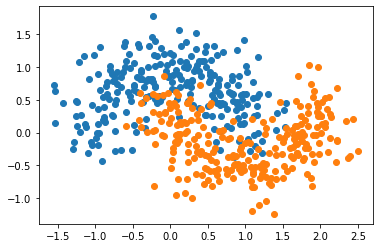

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# 使用逻辑回归
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.824

In [6]:
# 使用SVM
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.904

In [7]:
# 使用决策树
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.864

In [8]:
# 求出三种模型对测试数据的预测结果
y_predict1 = log_clf.predict(X_test)
y_predict2 = svc_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.904

## VotingClassifier

In [9]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier和Pipeline的用法非常类似

voting_clf = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression()),
    ("svm_clf", SVC()),
    ("dt_clf", DecisionTreeClassifier())], 
                              voting='hard')

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.912

## Soft Voting

In [10]:
# voiting参数传入soft 这里注意SVC要显示传入probability=True
voting_clf1 = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression()),
    ("svm_clf", SVC(probability=True)),
    ("dt_clf", DecisionTreeClassifier(random_state=666))],
                               voting='soft')

voting_clf1.fit(X_train, y_train)
voting_clf1.score(X_test, y_test)

0.912

## Bagging

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# BaggingClassifier的第一个参数是给定一个算法类型
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, # n_estimators参数是创建多少个子模型
                                max_samples=100, # max_samples参数是每个子模型使用多少样本数据训练
                                bootstrap=True) # bootstrap为True表示为放回取样方式，为False表示为不放回取样方式

bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.888

## OOB

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 多加一个参数oob_score，True为使用OOB，既记住哪些样本取过，哪些没取过
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    bootstrap=True,
    oob_score=True)

bagging_clf.fit(X, y)

# 使用没取过样本作为测试数据

bagging_clf.oob_score_

0.906

## 并发取样

In [13]:
%%time
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    bootstrap=True,
    oob_score=True)

bagging_clf.fit(X, y)

Wall time: 1.22 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [14]:
%%time
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    bootstrap=True,
    oob_score=True,
    n_jobs=-1)

bagging_clf.fit(X, y)

Wall time: 2.04 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


## 特征取样

In [15]:
# max_features 表示随机取几个特征
# bootstrap_features为True表示对特征取样是放回取样方式
random_subspaces_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=500, 
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    max_features=1,
    bootstrap_features=True)

random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.792

In [16]:
random_patches_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    max_features=1,
    bootstrap_features=True)


random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.858

## 随机森林

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rf_clf.oob_score_

0.89

In [21]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True)
rf_clf2.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf_clf2.oob_score_

0.902

### Extra-Trees

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=True, random_state=None, verbose=0,
                     warm_start=False)

In [24]:
et_clf.oob_score_

0.884

### Ada Boosting

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500)

# Boosting方式没有OOB的概念，所以还是需要使用拆分后的样本数据
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.864

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier本身就是使用决策树作为算法实现的，所以不再需要传入算法实例
gd_clf = GradientBoostingClassifier(max_depth=2, n_estimators=100)

# Boosting方式没有OOB的概念，所以还是需要使用拆分后的样本数据
gd_clf.fit(X_train, y_train)
gd_clf.score(X_test, y_test)

## Stacking